# Sales Price Predcition

## problem statement

Sales prediction means predicting how much of a product people will buy based on factors
such as the amount you spend to advertise your product, the segment of people you
advertise for, or the platform you are advertising on about your product.

## Below mentioned are the steps to be followed
### Part 1

* Data understanding and exploration
* Data cleaning
* Data preparation
* Model building
* Prediction and Evaluation

In [1]:
# importing Required Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings 
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv(R"C:\Users\Maruthipadala\Downloads\archive (14)\Advertising.csv") # loading the dataset

In [3]:
df

,Unnamed: 0,TV,Radio,Newspaper,Sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9
...,...,...,...,...,...
195,196,38.2,3.7,13.8,7.6
196,197,94.2,4.9,8.1,9.7
197,198,177.0,9.3,6.4,12.8
198,199,283.6,42.0,66.2,25.5


In [4]:
df.shape  # shape of the data set

(200, 5)

In [5]:
df.isnull().sum()  # checking Null values

Unnamed: 0    0
TV            0
Radio         0
Newspaper     0
Sales         0
dtype: int64

In [6]:
df.drop(columns='Unnamed: 0',inplace=True) # dropping the column Unnamed:0

In [7]:
df.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


In [8]:
df.duplicated().sum()  # no duplicates in the data set

0

## EDA(Exploratory Data Analysis)

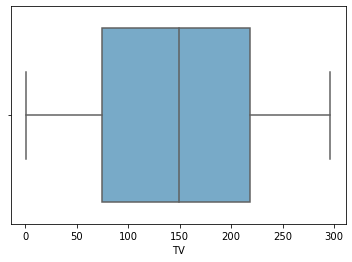

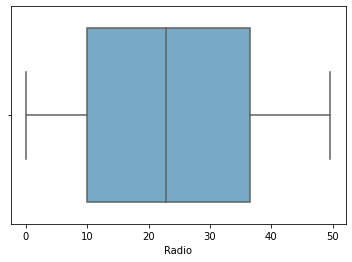

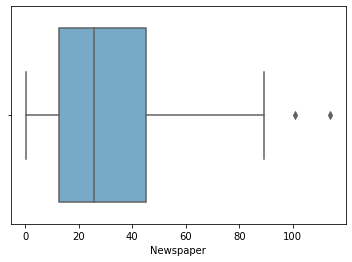

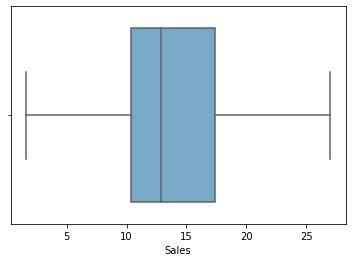

In [9]:

for i in df:
    sns.boxplot(df[i],palette = 'Blues',hue = df['Sales'])
    plt.show()

<AxesSubplot:>

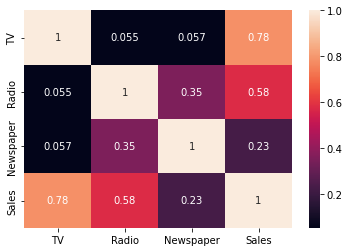

In [10]:
sns.heatmap(df.corr(),annot=True)

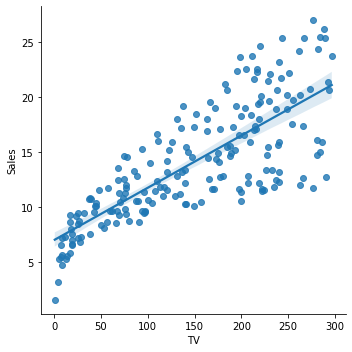

In [11]:
sns.lmplot(data=df,x='TV',y="Sales")

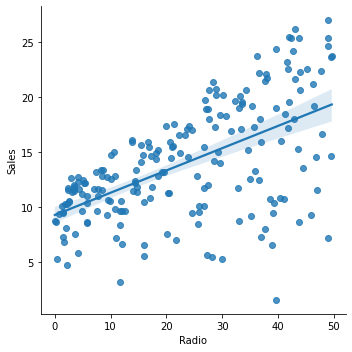

In [12]:
sns.lmplot(data=df,x='Radio',y="Sales")

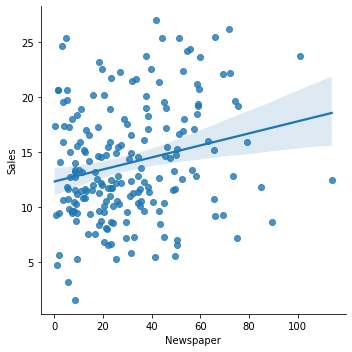

In [13]:
sns.lmplot(data=df,x='Newspaper',y="Sales")

## Data Process Into Train Test split

In [14]:
x=df.drop(columns='Sales')
y=df['Sales']

In [15]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)

In [16]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(160, 3)
(40, 3)
(160,)
(40,)


In [17]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()

In [18]:
x_train=sc.fit_transform(x_train)
x_test=sc.fit_transform(x_test)

# Model Building & Evaluation

In [19]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_percentage_error,r2_score

In [20]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_percentage_error

# Create a LinearRegression model
lr = LinearRegression()

# Fit the model to the training data
lr.fit(x_train, y_train)

# Predict the target values for the test data
y_pred = lr.predict(x_test)

# Calculate the mean absolute percentage error (MAPE)
lr_score = mean_absolute_percentage_error(y_test, y_pred)
lrr2_score = r2_score(y_test, y_pred)
print('mean_absolute_percentage_error:',lr_score)
print('r2_score:',lrr2_score)


mean_absolute_percentage_error: 0.26999014484430256
r2_score: 0.8281217233452883


In [21]:
df1=pd.DataFrame({'Test':y_test,'predicted':y_pred})
df1.head()

,Test,predicted
18,11.3,11.080426
170,8.4,8.573438
107,8.7,8.158800
98,25.4,24.581357
177,11.7,12.970968


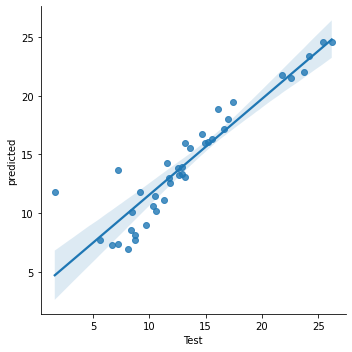

In [22]:
sns.lmplot(data=df1,x='Test',y="predicted")

In [23]:
from sklearn.tree import DecisionTreeRegressor
dr = DecisionTreeRegressor()
dr.fit(x_train,y_train)
y_pred=dr.predict(x_test)
dr_score=r2_score(y_test,y_pred)
print(dr_score)
df2=pd.DataFrame({'test':y_test,'predicted':y_pred})
df2.head()

0.8558919555100175


,test,predicted
18,11.3,10.9
170,8.4,10.9
107,8.7,11.0
98,25.4,25.5
177,11.7,12.8


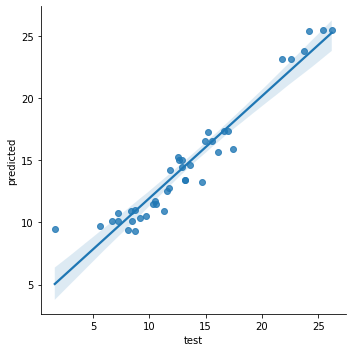

In [24]:
sns.lmplot(data=df2,x='test',y="predicted")